<a href="https://colab.research.google.com/github/EricHidekiMiyahara/naiveBayesEArvoreDeDecisao/blob/main/naiveBayesEArvoreDeDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving baseskate.xlsx to baseskate (3).xlsx


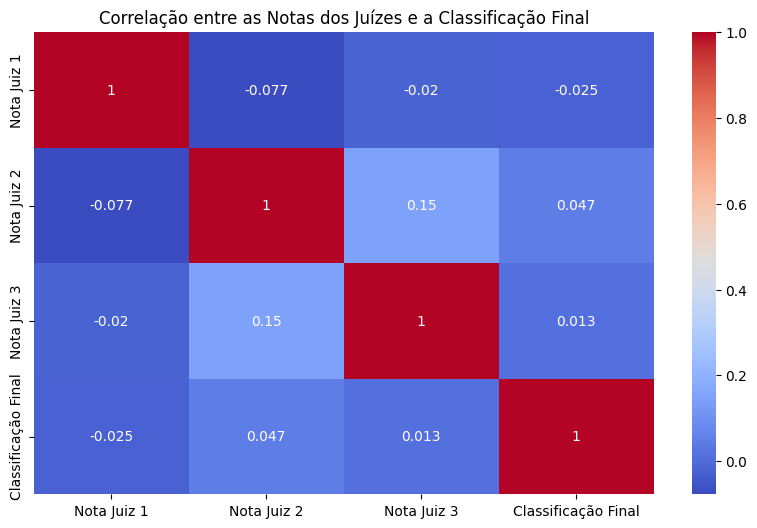


Naive Bayes -> Acurácia: 0.15, Precisão: 0.25, Recall: 0.15925925925925927, F1-score: 0.16699346405228757
Árvore de Decisão -> Acurácia: 0.3, Precisão: 0.30158730158730157, Recall: 0.31851851851851853, F1-score: 0.30256410256410254



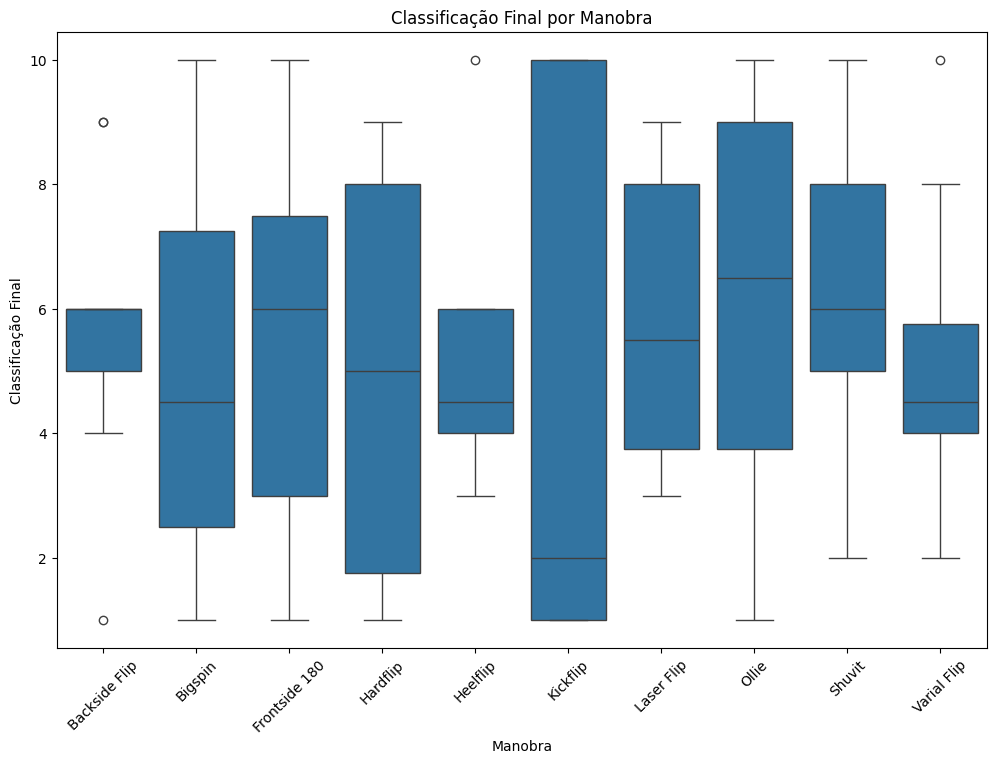

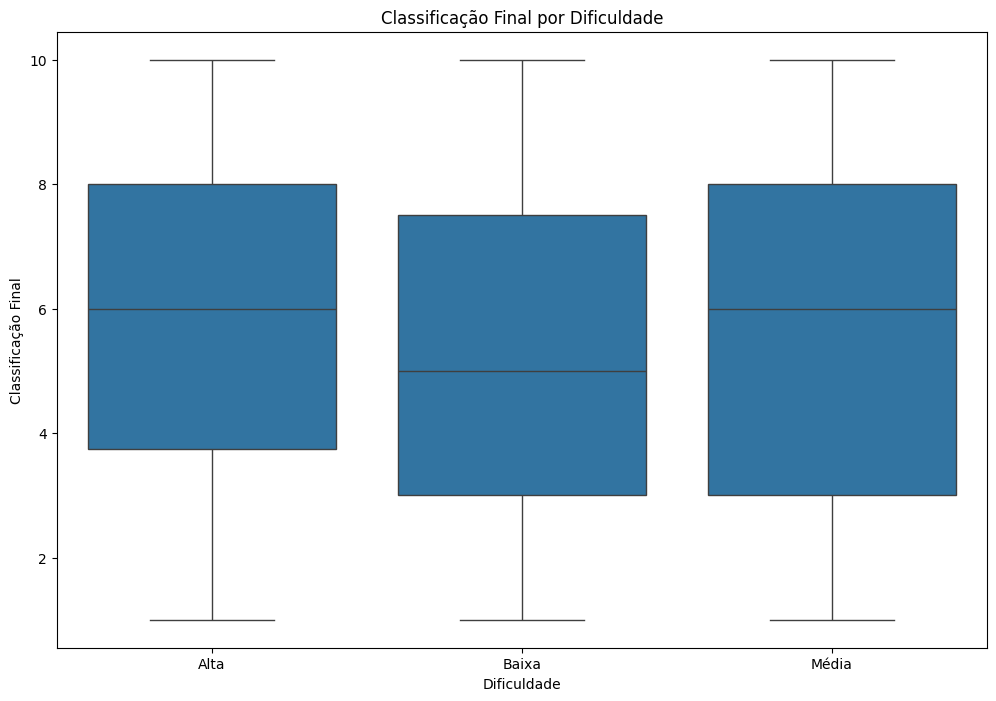

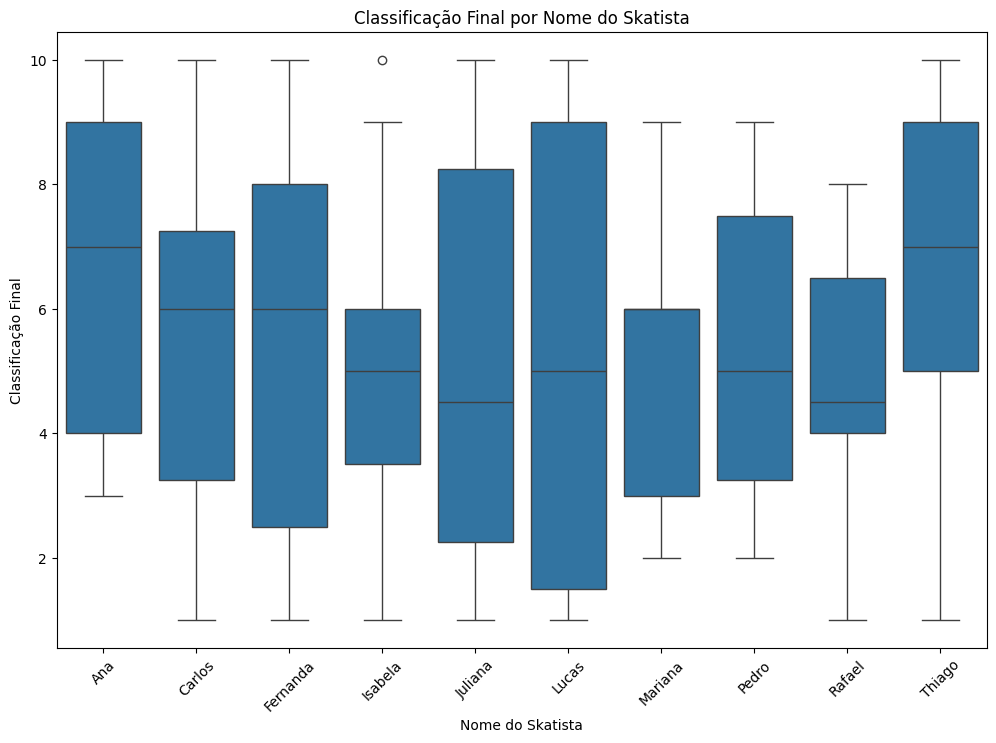

In [6]:
# Eric Hideki Miyahara

# Instalar o pacote necessário para ler arquivos Excel
!pip install openpyxl

# Carregar arquivo Excel do seu computador
from google.colab import files
uploaded = files.upload()

# Ler o arquivo Excel usando pandas
import pandas as pd
data = pd.read_excel('baseskate.xlsx')  # Substitua pelo nome correto do arquivo

# Verificar se há valores negativos nas notas dos juízes
for coluna in ['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3']:
    if (data[coluna] < 0).any():
        raise ValueError(f"A coluna {coluna} contém valores negativos, o que não é permitido.")

# Garantir que as notas estejam no intervalo de 0 a 10 (ou outro intervalo apropriado)
data[['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3']] = data[['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3']].clip(0, 10)

# Normalizar as notas dos juízes entre 0 e 1 (se necessário para o modelo)
data[['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3']] = data[['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3']] / 10

# Ver as primeiras linhas do dataframe
data.head()

# Categorizar a Classificação Final em três grupos: Baixa, Média e Alta
bins = [0, 3.33, 6.66, 10]  # Divisões entre as classes
labels = ['Baixa', 'Média', 'Alta']  # Rótulos das categorias

# Criar uma nova coluna para a Classificação Final categorizada
data['Classificação Final Categorias'] = pd.cut(data['Classificação Final'], bins=bins, labels=labels)

# Análise exploratória para identificar padrões nas manobras e feedback dos juízes
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a correlação entre as notas dos juízes e a Classificação Final
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Nota Juiz 1', 'Nota Juiz 2', 'Nota Juiz 3', 'Classificação Final']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre as Notas dos Juízes e a Classificação Final")
plt.show()

# Pré-processar os dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

label_encoder_manobra = LabelEncoder()
label_encoder_skatista = LabelEncoder()
label_encoder_dificuldade = LabelEncoder()

# Convertendo colunas categóricas em numéricas
data['Nome do Skatista'] = label_encoder_skatista.fit_transform(data['Nome do Skatista'])
data['Manobra'] = label_encoder_manobra.fit_transform(data['Manobra'])
data['Dificuldade'] = label_encoder_dificuldade.fit_transform(data['Dificuldade'])

# Definir características e rótulos (usando a nova coluna de Classificação Final categorizada)
X = data.drop(['Classificação Final', 'Classificação Final Categorias'], axis=1)
y = data['Classificação Final Categorias']

# Dividir em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar e avaliar Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Treinar e avaliar Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Função para avaliar modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    return accuracy, precision, recall, f1

# Resultados Naive Bayes
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(y_test, y_pred_nb)
print(f'\nNaive Bayes -> Acurácia: {accuracy_nb}, Precisão: {precision_nb}, Recall: {recall_nb}, F1-score: {f1_nb}')

# Resultados Árvore de Decisão
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(y_test, y_pred_dt)
print(f'Árvore de Decisão -> Acurácia: {accuracy_dt}, Precisão: {precision_dt}, Recall: {recall_dt}, F1-score: {f1_dt}\n')

# Gráficos com ajustes

# Gráfico: Classificação Final por Manobra (com nomes das manobras)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manobra', y='Classificação Final', data=data)
plt.title('Classificação Final por Manobra')

# Usando as categorias originais de manobras para o eixo x
manobras_rotulos = label_encoder_manobra.classes_  # Obtém os nomes das manobras originais
plt.xticks(ticks=range(len(manobras_rotulos)), labels=manobras_rotulos, rotation=45)
plt.show()

# Gráfico: Classificação Final por Dificuldade (com categorias baixa, média e alta)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dificuldade', y='Classificação Final', data=data)
plt.title('Classificação Final por Dificuldade')

# Usando as categorias originais de dificuldade para o eixo x
dificuldade_rotulos = label_encoder_dificuldade.classes_  # Obtém os rótulos originais de dificuldade
plt.xticks(ticks=range(len(dificuldade_rotulos)), labels=dificuldade_rotulos, rotation=0)
plt.show()

# Gráfico: Classificação Final por Nome do Skatista (com nomes dos skatistas)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nome do Skatista', y='Classificação Final', data=data)
plt.title('Classificação Final por Nome do Skatista')

# Usando as categorias originais dos skatistas para o eixo x
skatista_rotulos = label_encoder_skatista.classes_  # Obtém os nomes dos skatistas originais
plt.xticks(ticks=range(len(skatista_rotulos)), labels=skatista_rotulos, rotation=45)
plt.show()